
# Project: Investigate The Movie Dataset TMDb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#ques">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**This dataset includes detailed information about 10k movies including their ratings, adjusted cost and revenue informations in terms of 2010 US dollars to avoid inflatation conflicts.**

**The goal of this report is to explore genreal chractrisitics of the dataset and trim it\
in order to answer the posed questions**

We'll be using Pandas and Numpy for most of the data manipulation process,\
Mathplotlib for Visualization and seaborn for a much cooler look to our graphs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
sns.set()
from statistics import mode
%matplotlib inline

In [2]:
#Loading the dataset
df = pd.read_csv('tmdb-movies.csv')

<a id='ques'></a>
## Questions

>**1st:** Which genres are most popular from year to year?
>
>**2nd:** What kinds of properties are associated with movies that have high revenues?
>
>**3rd:** Are there a certain production companies that has found a consistant formula of success?
>
>**4th:** Given that major films costing over 100 million dollars to produce, Can they still flop?
>
>**5th:** In 80s and 90s, which director(s) has the highest ratings and profits for his movies?
>

<a id='wrangling'></a>
## Data Wrangling
<ul>
<li><a href="#gen">General Properties</a></li>
<li><a href="#c1">Data Cleaning: stage 1</a></li>
<li><a href="#c2">Data Cleaning: Stage 2</a></li>
</ul>


<a id='gen'></a>
### General Properties

In [3]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**Priminalary Observations on the dataset:**

  >-**imdb_id** has 1 Nan,\
  >-**cast** has 76 NaNs,\
  >-**homepage** should be dropped,\
  >-**director** ha 44 NaNs,\
  >-**tagline and keywords** have too many NaNs and won't be of use in the Analysis step\
  so they should be drooped as well,\
  >-**overview** dosen't attribute any analytics qualities concerning this report, it should be dropped,\
  >-**genres** has 23 NaNs,\
  >-**production_companies** has many NaNs but it's essential for gainig indights on the data\
  so, instead of dropping it, I'll replace the NaN values with "Not Available", and\
  >-**release_date** should be converted into date string.

<a id='c1'></a>
### Data Cleaning: Stage 1

 At first, let's do what should be done about the preminilary notes above.

In [6]:
#dropping the listed columns
df.drop(['homepage','tagline','keywords','overview'], axis=1, inplace=True)

In [7]:
#drop the NaN value of the subset columns
#since all of them are almost 100 rows, they won't effect the dataset quality
df.dropna(subset=['imdb_id','cast','director','genres'],inplace=True)

In [8]:
#fill the NaN value of production companies with "Not Available"
#to over come the limitation and still be able to extract some info from the categorial proprtity
df.production_companies.fillna("Not Available", inplace=True)

In [9]:
#change the formation of release dates into a date string
#only for the purpose of printng movie info when desired, won't be used otherwise
df.release_date = pd.to_datetime(df.release_date).dt.strftime('%Y-%m-%d')

**Let's Investigate the data furthur, checking out duplicates....**

        The duplicates possibility that could lead to faulty insights into the dataset is the
        possability of having duplicated movies....

In [10]:
print("There're {} duplicated movie titles in the data ,".format(df.original_title.duplicated().sum()))
print("with {} duplicated imdb_id and {} duplicated movie id;".format(
df.imdb_id.duplicated().sum(),df.id.duplicated().sum()))
print("which means that: \"There's 1 duplicated movie according to imdb_id\".")

There're 293 duplicated movie titles in the data ,
with 1 duplicated imdb_id and 1 duplicated movie id;
which means that: "There's 1 duplicated movie according to imdb_id".


        To fix that, Let's drop duplicates of imdb_id while preserving the first occurance only.
        And Let's drop the id column, since we can depend on imdb_id instead.

In [11]:
df.drop_duplicates(subset=['imdb_id'],keep='first',inplace=True)

In [12]:
#since we have 2 movie ids' and imdb id can be used as informative info about
#the data to help find the movie's page on imdb, then we'll drop id "not needed"
df.drop(['id'],axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10726 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10726 non-null  object 
 1   popularity            10726 non-null  float64
 2   budget                10726 non-null  int64  
 3   revenue               10726 non-null  int64  
 4   original_title        10726 non-null  object 
 5   cast                  10726 non-null  object 
 6   director              10726 non-null  object 
 7   runtime               10726 non-null  int64  
 8   genres                10726 non-null  object 
 9   production_companies  10726 non-null  object 
 10  release_date          10726 non-null  object 
 11  vote_count            10726 non-null  int64  
 12  vote_average          10726 non-null  float64
 13  release_year          10726 non-null  int64  
 14  budget_adj            10726 non-null  float64
 15  revenue_adj        

 **We can see from info that all major cleaning of the dataset has been performed successfully.**
 
 **Now, let's clean the dataset in a deeper sense with the nature of the posed questions in mind.**

<a id='c2'></a>
### Data Cleaning: Stage 2

#### Notes about cleaning the data:
   **After finishing stage 1 succesfully, We'll focus on deeper cleaning notes and steps to make the data more informative and easier to analyize:**
     
>**1**. since we've **budget_adj** and **revenue_adj** in 2010 US dollars to avoid inflatation, we don't need **budget** or **revenue**.
>
>**2**. create **profit** column that has the value of"= **revenue_adj** - **budject_adj**.
>
>**3**. create **ticks** column for the purpose of tracking the uniqueness of the data in case of exploading it.
>
>**4**. since **cast, diretor, keywords, and genres** have multiple data separated by "|",\
we need to create a function that will distribute the multiple data in a cell through multiple rows
while keeping the rest of the cells in the row the same.

In [14]:
#dropping revenue and budget "using adjusted budget and revenue values will give a more fare
#insights into the dataset while making analysis depending on revenue and/or budget".
df.drop(['budget','revenue'],axis=1,inplace=True)

In [15]:
#creating a profit column = revenue - budget
df['profit'] = df.revenue_adj - df.budget_adj

In [16]:
#creating ticks column to preserve uniqness while exploding the data
df['ticks'] = range(len(df.index.values))

    Functions section:

In [17]:
def expload(df,col):
    '''
    INPUT: a dataframe df and a column name str in the dataframe col
    PROCEDD: spreading the multiple information in col separated by '|' into multiple rows
            with the same info of the rest of the row.
    OUTPUT: a dataframe df with the spreaded multiple rows instead
    '''
    columns = df.columns.tolist()
    columns.remove(col)
    df = df.set_index(columns).apply(lambda x: x.str.split('|').explode()).reset_index()
    return df

In [18]:
def identifybytick(df,tick,col):
    '''
    INPUT: a dataframe df, a tick column cell value int, and a column name str.
    PROCESS: identify a cell value in the col by the tick value.
    OUTPUT: The identified cell value
    '''
    cell = df[df.ticks==tick][col].values[0]
    return cell

In [19]:
def printmovie(df,tick):
    '''
    INPUT: a dataframe df, and a tick value of the tick column.
    PROCESS: print the column information of the tick value provided 
            as a display of the specific row info
    OUTPUT: no output, only the print statment
    '''
    print("\n\t Movie Title: {}".format(
        identifybytick(df,tick,'original_title')))
    print("\n\t Produced in {}, Prmiered in {},".format(
        identifybytick(df,tick,'release_year'),identifybytick(df,tick,'release_date')))
    print("\n\t Budget astimated as {}$ 'in 2010 $ accounting',".format(
        identifybytick(df,tick,'budget_adj')))
    print("\n\t Revenue astomated as {}$ 'in 2010 $ accounting',".format(
        identifybytick(df,tick,'revenue_adj')))
    print("\n\t Which makes the Loss on this movie is {}$,".format(
        identifybytick(df,tick,'profit')))
    print("\n\t Producers by: {}".format(
        identifybytick(df,tick,'production_companies').split('|')))
    print("\n\t Cast: {}".format(
        identifybytick(df,tick,'cast').split('|')))
    print("\n\t Directed by: {}\n".format(
        identifybytick(df,tick,'director').split('|')))

<a id='eda'></a>
## Exploratory Data Analysis

### Basic Statistical Analysis and Visualization

In [20]:
#To present the folating number in a normal format not in the scientific number format
pd.set_option('display.float_format', '{:.2f}'.format)

In [21]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,ticks
count,10726.00,10726.00,10726.00,10726.00,10726.00,10726.00,10726.00,10726.00,10726.00
mean,0.65,102.49,219.91,5.96,2001.26,17773584.65,52030472.50,34256887.85,5362.50
std,1.00,30.47,578.93,0.93,12.82,34472199.75,145454712.30,125968367.90,3096.47
min,0.00,0.00,10.00,1.50,1960.00,0.00,0.00,-413912431.00,0.00
25%,0.21,90.00,17.00,5.40,1995.00,0.00,0.00,0.00,2681.25
50%,0.39,99.00,39.00,6.00,2006.00,0.00,0.00,0.00,5362.50
75%,0.72,112.00,148.00,6.60,2011.00,21126905.80,34750610.74,13862242.53,8043.75
max,32.99,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41,2750136650.92,10725.00


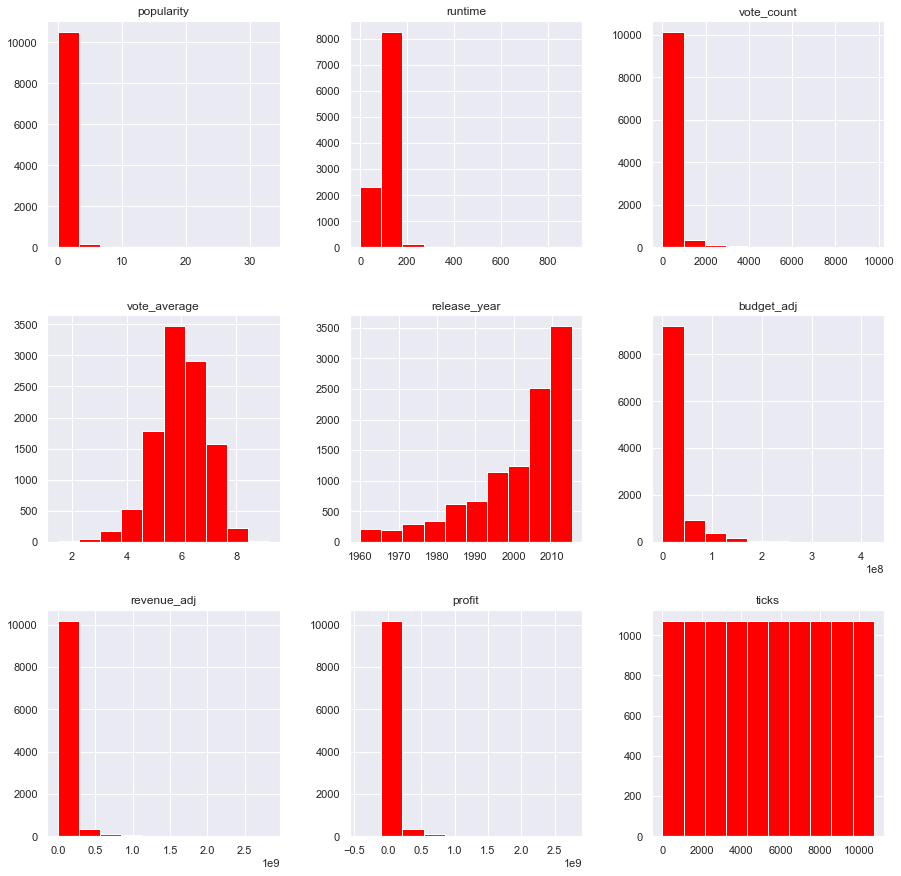

In [22]:
df.hist(figsize=(15,15),color='red');

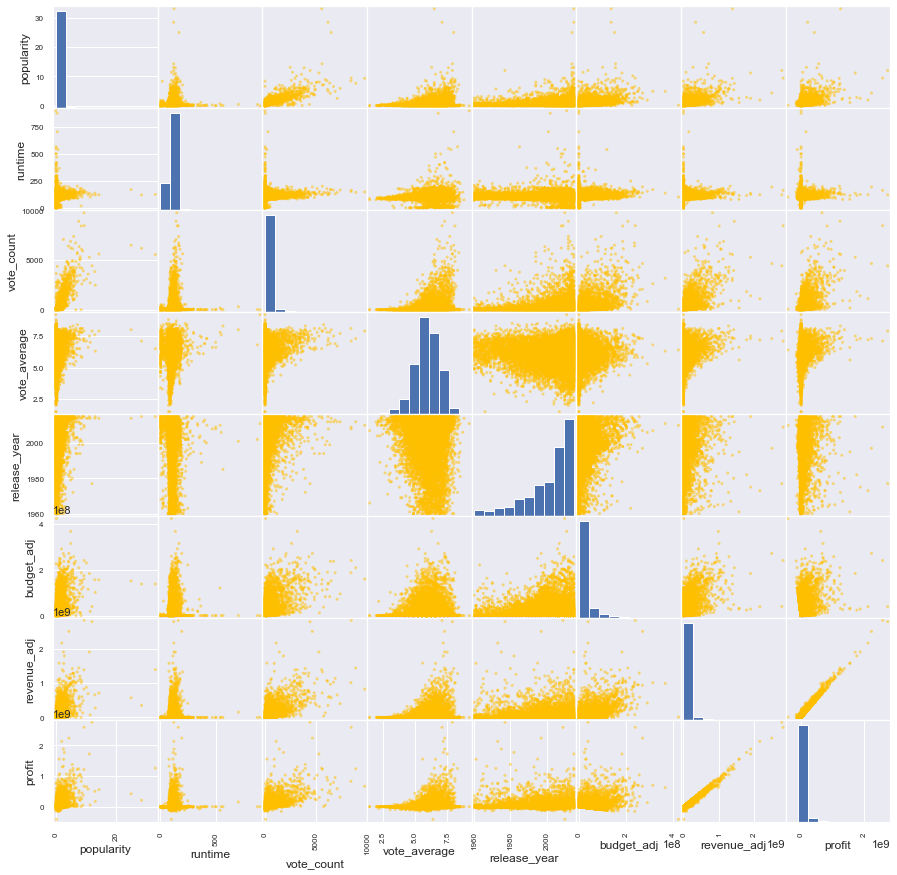

In [23]:
pd.plotting.scatter_matrix(df[['popularity', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 
                       'revenue_adj', 'profit']],figsize=(15,15),color='#ffbf00');

In [24]:
df.corr()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,ticks
popularity,1.00,0.14,0.80,0.22,0.09,0.51,0.61,0.56,-0.13
runtime,0.14,1.00,0.16,0.18,-0.12,0.22,0.18,0.14,0.08
vote_count,0.80,0.16,1.00,0.26,0.11,0.59,0.71,0.66,-0.11
vote_average,0.22,0.18,0.26,1.00,-0.13,0.10,0.20,0.20,0.08
release_year,0.09,-0.12,0.11,-0.13,1.00,0.02,-0.06,-0.08,-0.73
budget_adj,0.51,0.22,0.59,0.10,0.02,1.00,0.65,0.47,-0.01
revenue_adj,0.61,0.18,0.71,0.20,-0.06,0.65,1.00,0.98,0.03
profit,0.56,0.14,0.66,0.20,-0.08,0.47,0.98,1.00,0.04
ticks,-0.13,0.08,-0.11,0.08,-0.73,-0.01,0.03,0.04,1.00


### Research Question 1 
### Which genres are most popular from year to year?

In [25]:
df.popularity.describe()

count   10726.00
mean        0.65
std         1.00
min         0.00
25%         0.21
50%         0.39
75%         0.72
max        32.99
Name: popularity, dtype: float64

In [26]:
#exploading genres "removing the '|' separator",
#refer to the function at the end of the cleaning section
detailed_gen = expload(df,'genres')

In [27]:
#filtering only the 25% higest popularity ratings
detailed_gen = detailed_gen.query("popularity>={}".format(df.popularity.describe()['75%']))

In [28]:
#generating the series that contains the answers attribute
gen_list = detailed_gen.groupby('release_year')['genres'].unique()

In [29]:
#replacing the values of the series with the mode of each list value
gen_mode = gen_list.apply(lambda l : mode(l))

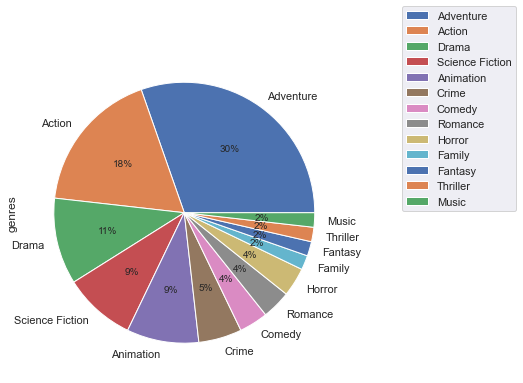

In [31]:
#visualizing the occurances for most popular genres from year to year
gen_mode.value_counts().plot(kind='pie',figsize=(6,6),autopct='%1.0f%%');
plt.legend(bbox_to_anchor=(1.15, 1.15))
plt.show();

In [32]:
#print the answer's report 
print("The Answer:")
print("*"*12)
print("\nThe Most popular genres from year to year are as follows:\n")
print(gen_mode)
print("\nThe Most popular genre along the years is {}.".format(gen_mode.mode()[0]))

The Answer:
************

The Most popular genres from year to year are as follows:

release_year
1960              Drama
1961          Adventure
1962          Adventure
1963             Action
1964          Adventure
1965          Adventure
1966          Animation
1967             Family
1968    Science Fiction
1969          Adventure
1970          Animation
1971    Science Fiction
1972              Drama
1973          Animation
1974              Drama
1975              Drama
1976              Crime
1977          Adventure
1978              Music
1979             Horror
1980          Adventure
1981          Adventure
1982    Science Fiction
1983          Adventure
1984             Action
1985          Adventure
1986             Horror
1987    Science Fiction
1988             Action
1989          Animation
1990             Action
1991            Romance
1992              Crime
1993            Romance
1994           Thriller
1995              Crime
1996             Action
1997          

### Research Question 2 
### What kinds of properties are associated with movies that have high revenues?

    If we refer back to the priminllary analysis visualization
    and general describtive and correlation Analysis,
    we can see that aside from the obvious proprty of release_year, 
    there're 2 other properties (budget_adj and vote_count)
    that appear to be more associated with higher revenue.

   **Let's start by visualizing the relation between revenue and budget_adj**

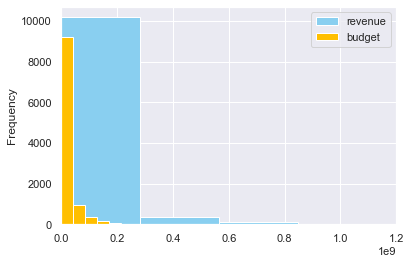

In [33]:
df.revenue_adj.plot.hist(label='revenue',bins=10,color='#89cff0',xlim=(0,1200000000))
df.budget_adj.plot.hist(label='budget',bins=10,color='#ffbf00',xlim=(0,1200000000))
plt.legend()
plt.show();

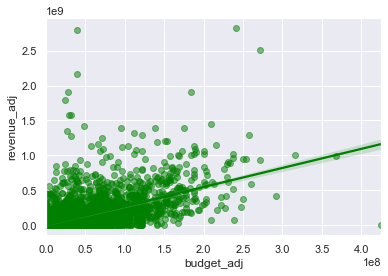

In [41]:
sns.regplot(x='budget_adj',y='revenue_adj',data=df,color='green',scatter_kws={'alpha':0.5});

    We can see that:
    
    In histogram of both the properties...
    Higher revenue is strongly asscoiated with higher budgeted movies up to a certain limit,
    after that the revenue is fairly high compared to the budget of the films.
    
    In the scatter and linearity plot...
    clearly stated that although the relation between budget and revenue isn't highly linear
    yet, it goes with positive slope linearity when mapped for all the dataset. 

   **Now, let's Visualize the relation between revenue and vote_count**

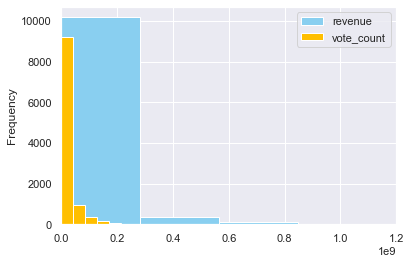

In [42]:
df.revenue_adj.plot.hist(label='revenue',bins=10,color='#89cff0',xlim=(0,1200000000))
df.budget_adj.plot.hist(label='vote_count',bins=10,color='#ffbf00',xlim=(0,1200000000))
plt.legend()
plt.show();

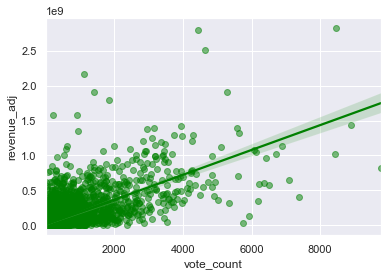

In [43]:
sns.regplot(x='vote_count',y='revenue_adj',data=df,color='green',scatter_kws={'alpha':0.5});

    We can see that:
    
    In histogram of both the proprties...
    Higher revenue is strongly asscoiated with higher vote_count which means that there're
    more interested viewers along the years up to a certain limit, after which the revenue
    is fairly high compared to vote_count which indicates that not necessry for high revenue movies
    to endure the test of time and keep interested audiance along the years.
    
    In the scatter and linearity plot...
    clearly stated that although the relation between vote_count and revenue isn't highly linear
    yet it goes with positive slope linearity when mapped for all the dataset. 

   **Now, let's Visualize the relation between revenue and release_year.**\
    "gives an insight on how much the film industry has grown along the years"

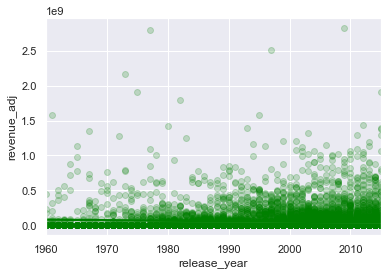

In [45]:
sns.regplot(x='release_year',y='revenue_adj',data=df,color='green',scatter_kws={'alpha':0.2});

    We can see that:
    In the scatter plot...
    
    The propability of gaining much more revenue from film industry has increased over the years
    from 1960 to 2010, which indicates that over time people has become more involved in
    movies and entertainment or simply that the population of man kind on earth has dramatically 
    increased over the years.

### Research Question 3 
### Are there a certain production companies that has fount a consistant formula of success?

In [46]:
#First, let's expload the production company string along the dataset with repetitive movies info
#refer to the function in the end of the cleaning section on more insights about how it's working
detailed_pc = expload(df,'production_companies')

In [47]:
#Remove the rows that dosen't have production company info
#remeber NaNs has been replaced by "Not Available" in the cleaning section
detailed_pc = detailed_pc[detailed_pc.production_companies != 'Not Available']

In [48]:
#Identifying sucess by grouping the top 25% profit values
sucess_profit = df.profit.describe()['75%']
detailed_pc = detailed_pc.query("profit >= {}".format(sucess_profit))

In [49]:
#grouping unique production companies and counting the unique years of sucess they had
groupedpc_series = detailed_pc.groupby(['production_companies'])['release_year'].unique().str.len()

In [50]:
#Identifying the most consistant profitable companies
maxpc = groupedpc_series.max()
maxpcname = groupedpc_series[groupedpc_series.values==maxpc].index

In [51]:
#printing the result
print("The Answer:")
print("*"*12)
print("\nThe Most presistent production companies over the years with {} years of hit films are:".format(maxpc))
print("\t{} and {}.".format(maxpcname[0],maxpcname[1]))

The Answer:
************

The Most presistent production companies over the years with 52 years of hit films are:
	Paramount Pictures and Universal Pictures.


### Research Question 4  
### Given that major films costing over 100 million dollars to produce, Can they still flop?

In [52]:
#First, let's filter the major films 'films with buget over 100 millions $'
df_majorfilms = df.query("budget_adj > 100000000")

In [53]:
#filtering folp films depending on profit 'films with no porfits or with losses'
df_majorfilms = df_majorfilms.query("profit <= {}".format(0))

In [54]:
df_majorfilms.shape

(71, 16)

The answer is:
        
        yes, even major fims that cost more than 100 million dollars can be a folp and
        the occurances of which is showed in the visual below in an ascending order of bar chart 

In [55]:
#sorting major films by profit column value in ascending order
df_majorfilms = df_majorfilms.sort_values(by='profit')

In [56]:
#creating a list of flopped major film names
movie_title = df_majorfilms.original_title.tolist()

In [57]:
#creating a list of flopped major film losses
profits = df_majorfilms.profit.tolist()

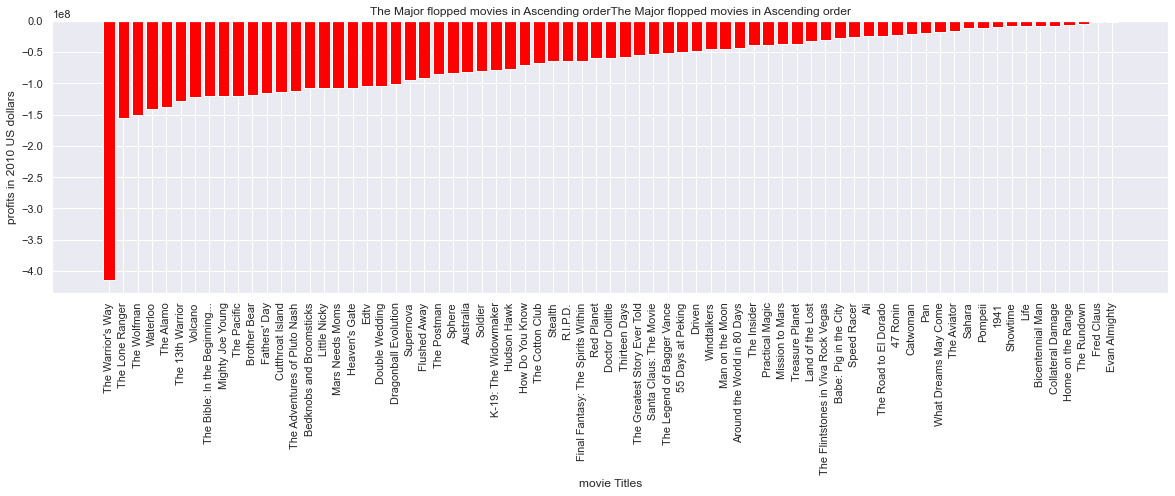

In [49]:
X_axis = np.array(range(len(profits)))
plt.figure(figsize=(20,5))
plt.bar(X_axis,profits,color='red')
plt.title('The Major flopped movies in Ascending orderThe Major flopped movies in Ascending order')
plt.xticks(X_axis,movie_title,rotation=90)
plt.xlabel('movie Titles')
plt.ylabel('profits in 2010 US dollars')
plt.show();

        We can see that there's a extreme loss among major flopped movies.
        Let's identify that and exclude it from the group...

In [50]:
#Identifying the tick of the the major loss movie
fmi = df_majorfilms[df_majorfilms.original_title == movie_title[0]]['ticks'].values[0]

In [51]:
print("we can see that along The flopped Major Movies, there's one movie which is dramatically flopped:")
printmovie(df,fmi)

we can see that along The flopped Major Movies, there's one movie which is dramatically flopped:

	 Movie Title: The Warrior's Way

	 Produced in 2010, Prmiered in 2010-12-02,

	 Budget astimated as 425000000.0$ 'in 2010 $ accounting',

	 Revenue astomated as 11087569.0$ 'in 2010 $ accounting',

	 Which makes the Loss on this movie is -413912431.0$,

	 Producers by: ['Boram Entertainment Inc.']

	 Cast: ['Kate Bosworth', 'Jang Dong-gun', 'Geoffrey Rush', 'Danny Huston', 'Ti Lung']

	 Directed by: ['Sngmoo Lee']



        Now, let's Drop it...

In [52]:
movie_title.pop(0)
profits.pop(0)
X_axis = np.array(range(len(profits)))

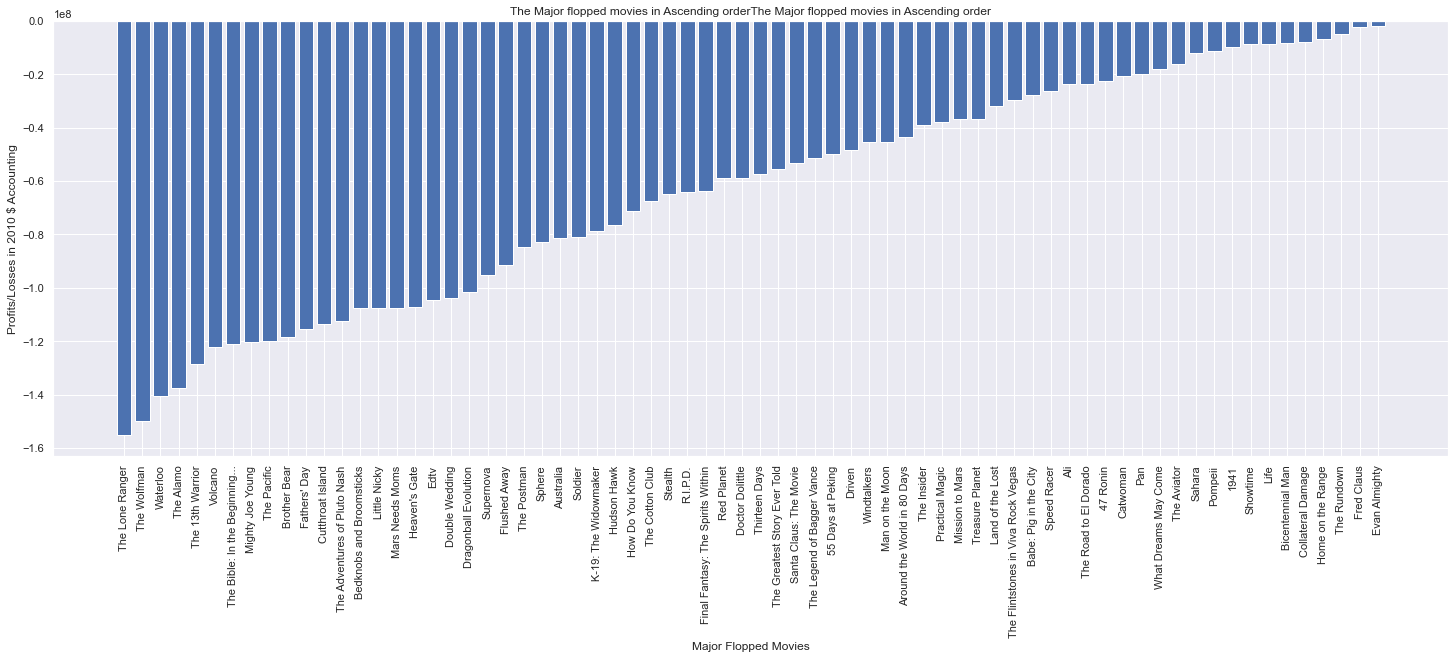

In [53]:
plt.figure(figsize=(25,8))
plt.bar(X_axis,profits)
plt.title('The Major flopped movies in Ascending orderThe Major flopped movies in Ascending order')
plt.xticks(X_axis,movie_title,rotation=90)
plt.xlabel('Major Flopped Movies')
plt.ylabel('Profits/Losses in 2010 $ Accounting')
plt.show();

In [54]:
#Ticks of the max and min losses of major films
fmi_max = df_majorfilms[df_majorfilms.original_title == movie_title[0]]['ticks'].values[0]
fmi_min = df_majorfilms[df_majorfilms.original_title == movie_title[-1]]['ticks'].values[0]

In [55]:
print("We can see that aside from the outlier mentioned before,\n")
print("\nThe losses of flopped Major films range from 0 to 155 million dollars 'in 2010 $ accounting'...")
print()
print('*'*40)
print("The Max losses on a flopped major movie is {}$ 'in 2010 $ accounting',".format(
    identifybytick(df_majorfilms,fmi_max,'profit').astype(int)))
printmovie(df,fmi_max)
print('*'*40)
print("The Min losses on a flopped major movie is {}$ 'in 2010 $ accounting',".format(
    identifybytick(df_majorfilms,fmi_min,'profit').astype(int)))
printmovie(df,fmi_min)

We can see that aside from the outlier mentioned before,


The losses of flopped Major films range from 0 to 155 million dollars 'in 2010 $ accounting'...

****************************************
The Max losses on a flopped major movie is -155110171$ 'in 2010 $ accounting',

	 Movie Title: The Lone Ranger

	 Produced in 2013, Prmiered in 2013-07-03,

	 Budget astimated as 238688504.948808$ 'in 2010 $ accounting',

	 Revenue astomated as 83578333.8231908$ 'in 2010 $ accounting',

	 Which makes the Loss on this movie is -155110171.1256172$,

	 Producers by: ['Walt Disney Pictures', 'Jerry Bruckheimer Films', 'Infinitum Nihil', 'Silver Bullet Productions (II)', 'Blind Wink Productions']

	 Cast: ['Johnny Depp', 'Armie Hammer', 'William Fichtner', 'Helena Bonham Carter', 'James Badge Dale']

	 Directed by: ['Gore Verbinski']

****************************************
The Min losses on a flopped major movie is -2103337$ 'in 2010 $ accounting',

	 Movie Title: Evan Almighty

	 Produced in 20

**The Catch is:**
### If a Major film flops, it has Major Losses!!!!




### Research Question 5  
### In 80s and 90s, which director has the highest ratings and profits for his movies?

In [56]:
#filtering the data to include only 80s and 90s films
df_80s90s = df.query("release_year >= 1980 and release_year < 2000")

In [58]:
#Exploading director "refer to the function at the end of the cleaning section"
df_80s90s = expload(df_80s90s,'director')

In [59]:
#grouping directors and getting the max vote_average for each one in an ascending sorted order
maxvote = df_80s90s.groupby('director')['vote_average'].max().sort_values()

In [60]:
maxvote

director
Valerie Breiman        2.30
Peter George           2.80
Luigi Cozzi            3.10
Chris Thomson          3.20
Farhad Mann            3.30
                       ... 
Chris Bould            8.40
Jonathan Demme         8.40
Saul Swimmer           8.50
Michael Henry Wilson   8.50
Martin Scorsese        8.50
Name: vote_average, Length: 1337, dtype: float64

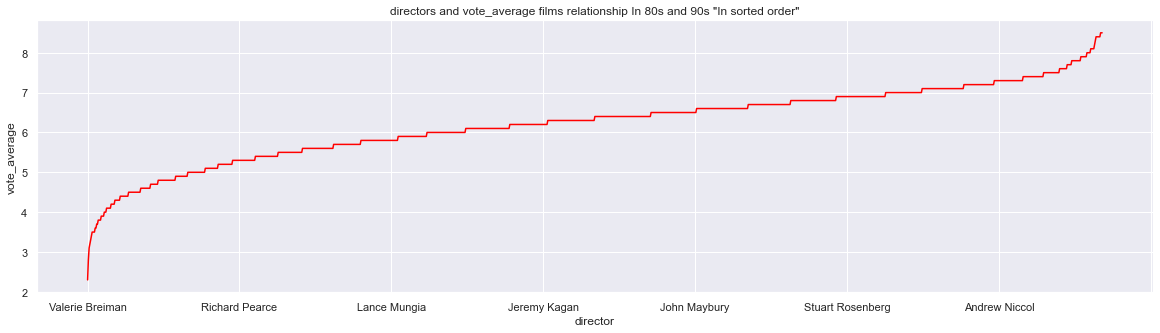

In [61]:
#visualize the result
maxvote.plot(figsize=(20,5),
             title='directors and vote_average films relationship In 80s and 90s "In sorted order"',
             color='red')
plt.ylabel('vote_average')
plt.show();

In [62]:
maxprofit = df_80s90s.groupby('director')['profit'].max().sort_values()

In [63]:
maxprofit

director
Moustapha Akkad     -83936678.17
John Bruno          -79838229.87
Hugh Johnson        -76888572.51
Rand Ravich         -72523376.08
Mikael Salomon      -67057915.39
                        ...     
Richard Marquand   1182994737.99
Irvin Kershner     1376997526.22
Irwin Winkler      1551568265.28
Steven Spielberg   1767968064.02
James Cameron      2234713671.21
Name: profit, Length: 1337, dtype: float64

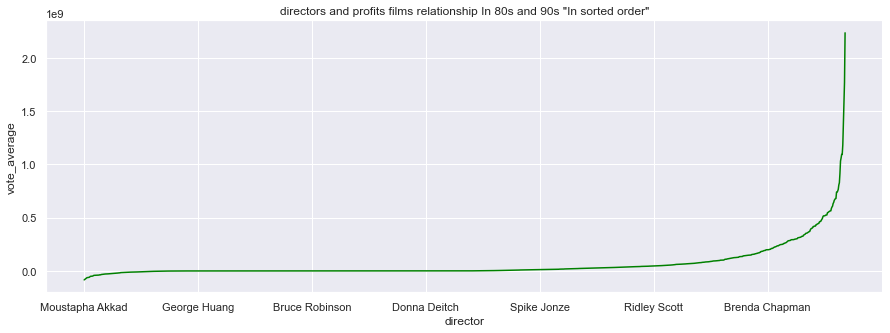

In [64]:
maxprofit.plot(figsize=(15,5),
               title='directors and profits films relationship In 80s and 90s "In sorted order"',
               color='green')
plt.ylabel('vote_average')
plt.show();

    We can see That:
    
    The director(s) that directed the highest vote_average rated movie In the 80s and 90s are:
    "Saul Swimmer", "Michael Henry Wilson", and "Martin Scorsese".
    
    The director that directed the most profitable movie In 80s and 90s is "James Cameron".

<a id='conclusions'></a>
## Conclusions

> **1- It appears that Advenure movie genre has been the most popular along the years.**
>
> **2- While trying to identify the property that affect revnue the most, we realized that revenue is not affected majorly by a single property, it's most likely a function of most of the properties that could be included in film industry " including properties that isn't in this data set"**
>
> **3- It's obvious that the profit can be made from film industry is growing gradually over time.**
>
> **4- We can see that both Paramount Pictures and Universal Pictures has found a magical formula of success movies as they appear to have the most consistant years of success in film industry "while execluding films with no data on their production companies".**
>
> **5- As for major films, the bad news is that Major films can flop and when they do, they folp dramatically, so watch out of these films!!**
>
> **6- The director(s) that directed the highest vote_average rated movie In the 80s and 90s are:
    "Saul Swimmer", "Michael Henry Wilson", and "Martin Scorsese",\
    The director that directed the most profitable movie In 80s and 90s is: "James Cameron".**

### Data Limitations:
> **1- Properities (homepage, keywords and tagline) have a lot of missing values which made them not useful in analyzing or informing the results about the dataset in any way.**
>
>**2- Although (homepage and tagline), in my opinion, couldn't have been used in any analytical steps, keyword could have been useful in analyzing movie lovers behaviour while searching for a movie to watch.**
>
>**3- As for production companies, despite its obvious relation to success in film industry, it had major number of missing values which made the result out of it isn't necessrly accurate.**
